In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'1.5.0'

In [3]:
from mnist import MNIST

In [4]:
mndata = MNIST('./data/mnist')
mndata.gz = True

In [5]:
images, labels = mndata.load_training()

In [6]:
def preview(img):
    """
    Render a image list into visible image
    """
    img_data = np.array(img)
    img_data = np.reshape(img_data, newshape=((28, 28)))
    plt.imshow(img_data, cmap=mpl.cm.Greys)
    plt.show()

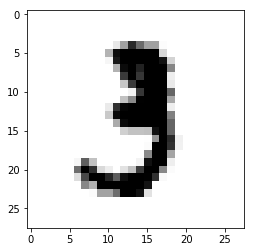

(None, 3)

In [7]:
preview(images[10]), labels[10]

In [8]:
img_width  = 28
img_height = 28

Xdata = np.array(images, dtype=np.uint8)
Xdata = np.reshape(Xdata, newshape=(60000, img_width, img_height, 1))
Ylabels = np.array(labels, dtype=np.uint)
Ydata = np.zeros((60000, 10), dtype=np.float32)
Ydata[np.arange(60000), Ylabels] = 1

In [9]:
Ydata

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
weights = {
    'conv1': tf.Variable(tf.random_normal([5, 5, 1, 4])),
    'conv2': tf.Variable(tf.random_normal([5, 5, 4, 8])),
    'W1': tf.Variable(tf.random_normal([7*7*8, 200])),
    'W2': tf.Variable(tf.random_normal([200, 10]))
}

biases = {
    'convb1': tf.Variable(tf.random_normal([4])),
    'convb2': tf.Variable(tf.random_normal([8])),
    'b1': tf.Variable(tf.random_normal([200])),
    'b2': tf.Variable(tf.random_normal([10]))
}

In [20]:
X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 10], name='Y')

conv1 = tf.nn.conv2d(X, weights['conv1'], strides=[1, 1, 1, 1], padding='SAME')
convb1 = tf.nn.bias_add(conv1, biases['convb1'])
maxpool1 = tf.nn.max_pool(convb1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
relu1 = tf.nn.relu(maxpool1)

conv2 = tf.nn.conv2d(relu1, weights['conv2'], strides=[1, 1, 1, 1], padding='SAME')
convb2 = tf.nn.bias_add(conv2, biases['convb2'])
maxpool2 = tf.nn.max_pool(convb2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
relu2 = tf.nn.relu(maxpool2)

reshaped = tf.reshape(relu2, shape=[-1, 7*7*8])
fc1 = tf.matmul(reshaped, weights['W1']) + biases['b1']
fc_relu1 = tf.nn.relu(fc1)
fc_drop1 = tf.nn.dropout(fc_relu1, keep_prob=0.75)

out = tf.matmul(fc1, weights['W2']) + biases['b2']

prediction = tf.nn.softmax(out)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=out, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

initializer = tf.global_variables_initializer()

In [21]:
config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)
sess.run(initializer)

In [22]:
for i in range(0, 1000):
    _, loss_val = sess.run((train_op, loss), feed_dict={X: Xdata, Y: Ydata})
    print(loss_val)

2726917.5
2546577.2
2385839.2
2242821.2
2115131.0
1999472.8
1892937.5
1792840.1
1697315.2
1605471.0
1517726.8


KeyboardInterrupt: 